In [119]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf

# number of data
N=2000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


In [166]:
# we did not have time to write a fancy jupyter notebook

In [121]:
import numpy as np

# a nonlinear function of a 2d array x
def gaussian(x):
  return 50 * np.exp(-x ** 2 / 50)

def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    if c==3:
        if x[1] < gaussian(x[0]):
            r=1 
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

2 5 1


In [122]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black', labelsize=20)
plt.rc('ytick', direction='out', color='black', labelsize=20)
font = {'family' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

perc_train = 0.8
batch_size = 50

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 2000
train: 1600


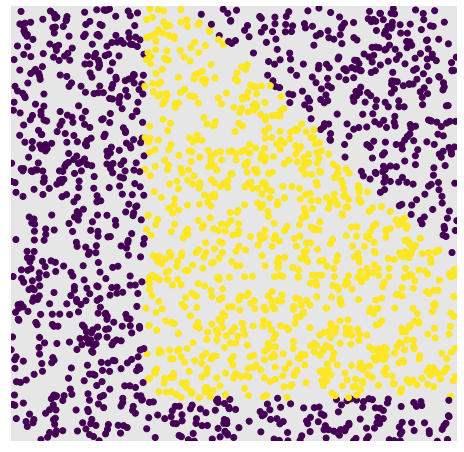

In [123]:
import numpy as np
x = np.loadtxt(filename("data",TYPE), delimiter=" ")
y = np.loadtxt(filename("labels",TYPE), delimiter=" ")

# dim of samaple
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xticks([])
plt.yticks([])
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [124]:
(x_train, y_train) = (x[0:N_train], y[0:N_train])
(x_valid, y_valid) = (x[N_train:], y[N_train:])
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 1600 	 Validation: 400


In [125]:
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [133]:
np.random.seed(12345)
def create_DNN(case = 1, activation='sigmoid', activation2='relu', dropout_rate=0.2, neurons=20, initializer=None):
  if case == 1:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation=activation2, kernel_initializer=initializer))
      model.add(Dense(neurons, activation=activation2, kernel_initializer=initializer))
      model.add(Dense(neurons, activation=activation2, kernel_initializer=initializer))
      model.add(Dropout(dropout_rate))
      model.add(Dense(1, activation=activation, kernel_initializer=initializer))
  if case == 2:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation=activation, kernel_initializer=initializer))
      model.add(Dense(neurons, activation=activation, kernel_initializer=initializer))
      model.add(Dense(1, activation=activation, kernel_initializer=initializer))
  return model

def compile_model(case=1, optimizer=tf.keras.optimizers.Adam(), initializer=None,
                  activation='sigmoid', activation2='relu', dropout=0.3, neurons=20):
    # create the mode
    model=create_DNN(case=case, activation=activation, activation2=activation2, 
                     dropout_rate= dropout, neurons=neurons, initializer=initializer)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,

                  metrics=['accuracy'])
    return model

In [160]:
i = tf.keras.initializers.Zeros()
#i = tf.keras.initializers.Ones()
#i = tf.keras.initializers.RandomNormal()
#i = tf.keras.initializers.RandomUniform()
#i = tf.keras.initializers.TruncatedNormal()
#i = tf.keras.initializers.Orthogonal()
model = compile_model(initializer=i)

In [161]:
history = model.fit(x_train, y_train, epochs=200, batch_size=50, validation_data=(x_valid, y_valid))

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 0.6831 - accuracy: 0.6394 - val_loss: 0.6626 - val_accuracy: 0.6275
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.7325 - val_loss: 0.5626 - val_accuracy: 0.7925
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.8131 - val_loss: 0.4484 - val_accuracy: 0.8550
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8531 - val_loss: 0.3842 - val_accuracy: 0.8875
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.8700 - val_loss: 0.3480 - val_accuracy: 0.8975
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8806 - val_loss: 0.3291 - val_accuracy: 0.8950
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8825 - val_loss: 0.3191 - val_accuracy: 0.8925
Epoch 8/200
3

min_val_loss : 0.1751214861869812


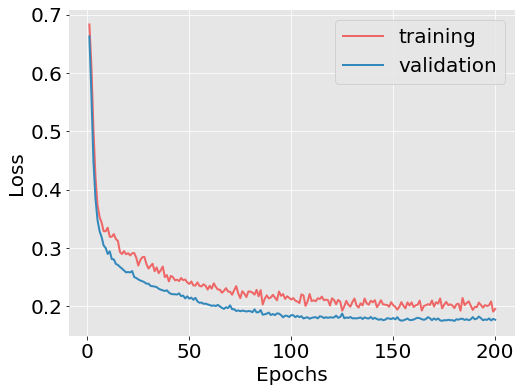

In [162]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,201)
plt.figure(figsize = (8,6))
plt.plot(epochs, loss_train, label='training')
plt.plot(epochs, loss_val, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
min_val_loss=min(loss_val)
print("min_val_loss :",min_val_loss)

max_val_accuracy : 0.9150000214576721


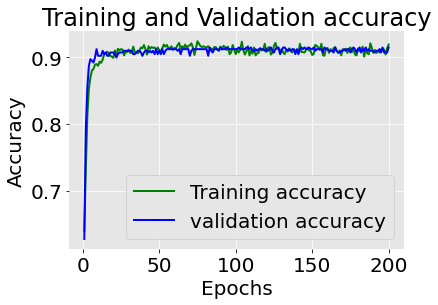

In [163]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1,201)
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
max_val_accuracy=max(val_accuracy)
print("max_val_accuracy :",max_val_accuracy)

In [165]:

l=[N,min_val_loss,max_val_accuracy]
print(l)



[2000, 0.1751214861869812, 0.9150000214576721]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


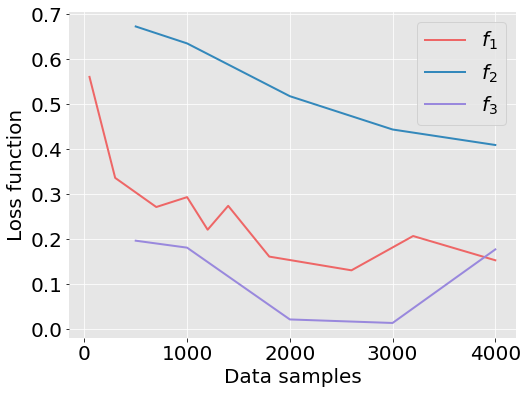

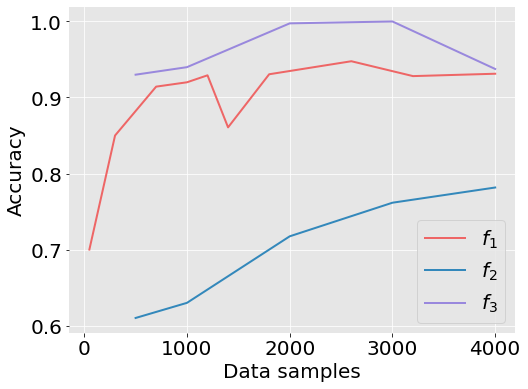

In [117]:
# zeros
[2000, 0.6914224028587341, 0.5299999713897705]
# ones
[2000, 0.691346287727356, 0.5525000095367432]
# random uniform
[2000, 0.29215380549430847, 0.9100000262260437]
# random normal
[2000, 0.14050999283790588, 0.9474999904632568]
# truncated
[2000, 0.25349852442741394, 0.9125000238418579]
# orthogonal
[2000, 0.1751214861869812, 0.9150000214576721]


[500, 0.19612854719161987, 0.9300000071525574]
[1000, 0.18069644272327423, 0.9399999976158142]
[2000, 0.020924320444464684, 0.9975000023841858]
[3000, 0.013034863397479057, 1.0]
[4000, 0.17679578065872192, 0.9375]




N_1=[50,300,700,1000,1200,1400,1800,2600,3200,4000]
min_val_loss_1=[0.5604909658432007,0.335830956697464,0.27100011706352234,0.2930019497871399,0.22052700817584991, 0.273648738861084, 0.16070018708705902,0.13017337024211884,0.2064848393201828,0.15253598988056183,]
max_val_accuracy_1=[0.699999988079071, 0.8500000238418579, 0.9142857193946838,0.9200000166893005,0.9291666746139526,0.8607142567634583,0.9305555820465088,0.9476914567220392,0.9281250238418579,0.9312499761581421]
N_2 = [500, 1000, 2000, 3000, 4000]
min_val_loss_2 = [0.6727, 0.6350, 0.5176, 0.4435, 0.4090]
max_val_accuracy_2 = [0.6100, 0.6299, 0.7174, 0.7616, 0.7816]
N_3 = [500, 1000, 2000, 3000, 4000]
min_val_loss_3 = [0.1961, 0.1806, 0.0209, 0.01303, 0.1767]
max_val_accuracy_3 = [0.93, 0.9399, 0.9975, 1, 0.9375]

plt.figure(figsize = (8,6))
plt.plot(N_1, min_val_loss_1, label=r'$f_1$')
plt.plot(N_2, min_val_loss_2, label=r'$f_2$')
plt.plot(N_3, min_val_loss_3, label=r'$f_3$')
plt.xlabel('Data samples')
plt.ylabel('Loss function')
plt.legend()

plt.show()


plt.figure(figsize = (8,6))
plt.plot(N_1, max_val_accuracy_1, label=r'$f_1$')
plt.plot(N_2, max_val_accuracy_2, label=r'$f_2$')
plt.plot(N_3, max_val_accuracy_3, label=r'$f_3$')
plt.xlabel('Data samples')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [171]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def gridsearch_DNN(optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam', 'Nadam'],
                   activation = ['sigmoid', 'relu', 'tanh', 'elu'],
                   activation2 = ['sigmoid', 'relu', 'tanh', 'elu'],
                   dropout = [0.3, 0.4, 0.5],
                   neurons = [5, 10, 15, 20, 25]
                   ):
    model_gridsearch = KerasClassifier(build_fn=compile_model,
                                       epochs=5,  
                                       verbose=0) # set 0 to avoid spam

    # PARAMETERS
    param_grid = dict(optimizer=optimizer, activation=activation, activation2=activation2,
                      dropout=dropout, neurons=neurons)
    
    # GRID SEARCH (SCIKIT)
    grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
    grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

    # PRINT RESULTS
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
gridsearch_DNN()